# Proyek Analisis Data: [E-Commerce Public Dataset]

Nama : Gardasvara Mistortoify

Email : m312b4ky1589@bangkit.academy

ID Dicoding : Gardasvara Mistortoify

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana performa penjualan dan revenue berdasarkan wilayah?

- Pertanyaan 2 : Produk apa yang paling populer di setiap wilayah?

- Pertanyaan 3 : Apakah ada pola musiman dalam penjualan?

- Pertanyaan 4 : Apakah ada daerah atau demografi tertentu yang perlu fokus lebih karena penjualan rendah?

## Import Semua Packages/Library yang Digunakan

In [1639]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [1640]:
customers_df = pd.read_csv(r'D:\UNS\Bangkit ML\Proyek Data Analisis\data\customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [1641]:
geolocation_df = pd.read_csv(r'D:\UNS\Bangkit ML\Proyek Data Analisis\data\geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [1642]:
order_items_df = pd.read_csv(r'D:\UNS\Bangkit ML\Proyek Data Analisis\data\order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [1643]:
order_payments_df = pd.read_csv(r'D:\UNS\Bangkit ML\Proyek Data Analisis\data\order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [1644]:
order_reviews_df = pd.read_csv(r'D:\UNS\Bangkit ML\Proyek Data Analisis\data\order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [1645]:
orders_df = pd.read_csv(r'D:\UNS\Bangkit ML\Proyek Data Analisis\data\orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [1646]:
product_category_name_translation_df = pd.read_csv(r'D:\UNS\Bangkit ML\Proyek Data Analisis\data\product_category_name_translation.csv')
product_category_name_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [1647]:
products_df = pd.read_csv(r'D:\UNS\Bangkit ML\Proyek Data Analisis\data\products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [1648]:
sellers_df = pd.read_csv(r'D:\UNS\Bangkit ML\Proyek Data Analisis\data\sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Insight :
- Sumber Data:

    Semua data yang dikumpulkan berasal dari file CSV yang terletak di direktori D:\UNS\Bangkit ML\Proyek Data Analisis\data.
    Setiap file CSV mewakili satu tabel data, misalnya customers_dataset.csv berisi data pelanggan.

- Pilihan Library:

    Pandas: Library Pandas digunakan untuk membaca file CSV dan menyimpan data dalam bentuk DataFrame. DataFrame adalah struktur data yang sangat fleksibel dan efisien untuk manipulasi data dalam Python.

- Variabel:

    Setiap DataFrame disimpan dalam sebuah variabel dengan nama yang mencerminkan isi tabel tersebut (misalnya, customers_df, order_items_df). Ini memudahkan dalam mengelola dan mengakses data.

- Melihat Data Awal:

    Fungsi head() digunakan untuk menampilkan beberapa baris pertama dari setiap DataFrame. Ini berguna untuk melakukan pemeriksaan cepat terhadap data dan memastikan bahwa data telah dibaca dengan benar.

### Asessing Data

#### Menilai Dataset customers_df

In [1649]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [1650]:
customers_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [1651]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


In [1652]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


#### Menilai Dataset geolocation_df

In [1653]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [1654]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [1655]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  261831


In [1656]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


#### Menilai Dataset order_items_df

In [1657]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [1658]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [1659]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

Jumlah duplikasi:  0


In [1660]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


#### Menilai Dataset order_payments_df

In [1661]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [1662]:
order_payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [1663]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())

Jumlah duplikasi:  0


In [1664]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


#### Menilai Dataset order_reviews_df

In [1665]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [1666]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [1667]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())

Jumlah duplikasi:  0


In [1668]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


#### Menilai Dataset orders_df

In [1669]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [1670]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [1671]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


In [1672]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


#### Menilai Dataset product_category_name_translation_df

In [1673]:
product_category_name_translation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [1674]:
product_category_name_translation_df.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [1675]:
print("Jumlah duplikasi: ", product_category_name_translation_df.duplicated().sum())

Jumlah duplikasi:  0


In [1676]:
product_category_name_translation_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


#### Menilai Dataset products_df

In [1677]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [1678]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [1679]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

Jumlah duplikasi:  0


In [1680]:
products_df.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


#### Menilai Dataset sellers_df

In [1681]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [1682]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [1683]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())

Jumlah duplikasi:  0


In [1684]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


Insight :
    
- Melakukan Penilaian terhadap dataset
    - df.info(): Melihat ringkasan informasi tentang DataFrame, termasuk jumlah baris, kolom, tipe data, dan penggunaan memori.
    - df.isna().sum(): Menghitung jumlah nilai yang hilang (missing values) pada setiap kolom.    
    - df.duplicated().sum(): Menghitung jumlah baris duplikat dalam DataFrame.
    - df.describe(): Mendapatkan statistik deskriptif untuk kolom numerik (misalnya, mean, median, standar deviasi, minimum, maksimum).

- Visualisasi Data
    - Memahami Distribusi Data: Gunakan plot seperti histogram, box plot, atau scatter plot untuk melihat distribusi data pada variabel numerik.
    - Menemukan Outlier: Identifikasi data yang sangat berbeda dari data lainnya.
    - Melihat Hubungan Antar Variabel: Gunakan scatter plot atau heatmap untuk melihat korelasi antara variabel.


### Cleaning Data

#### Membersihkan tabel customers_df (BERSIH)

#### Membersihkan tabel geolocation_df (DUPLICATES)

In [1685]:
geolocation_df.duplicated().sum()

261831

In [1686]:
geolocation_df[geolocation_df.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [1687]:
geolocation_df.drop_duplicates(inplace=True)

In [1688]:
print("Jumlah duplikasi: ", geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


#### Membersihkan tabel order_items_df (BERSIH)

#### Membersihkan tabel order_payments_df (BERSIH)

#### Membersihkan tabel order_reviews_df (MISSING VALUE & TIPE DATA) 

##### Membersihkan Missing Value

In [1689]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [1690]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [1691]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,NaN,NaN,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,NaN,NaN,2017-07-16 00:00:00,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,NaN,NaN,2017-12-13 00:00:00,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,NaN,NaN,2018-04-27 00:00:00,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42


In [1692]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [1693]:
order_reviews_df.review_comment_message.value_counts()

review_comment_message
Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                            

In [1694]:
# order_reviews_df['review_comment_title'].fillna("Tidak Ada", inplace=True)
# order_reviews_df['review_comment_message'].fillna("Tidak Ada", inplace=True)   
# customers_df.fillna(value="Prefer not to say", inplace=True)
order_reviews_df.fillna(value="Blank", inplace=True)

In [1695]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Membersihkan Tipe Data

In [1696]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     99224 non-null  object
 4   review_comment_message   99224 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [1697]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column], format='%Y-%m-%d %H:%M:%S')

In [1698]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     99224 non-null  object        
 4   review_comment_message   99224 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [1699]:
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Blank,Blank,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Blank,Blank,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Blank,Blank,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Blank,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Blank,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


#### Membersihkan tabel orders_df (MISSING VALUE & TIPE DATA)

##### Mengubah Tipe Data

In [1700]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [1701]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])


In [1702]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [1703]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


##### Membersihkan Missing Value

In [1704]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [1705]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [1706]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [1707]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaT,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [1708]:
orders_df.order_approved_at.value_counts()

order_approved_at
2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: count, Length: 90733, dtype: int64

In [1709]:
orders_df.order_delivered_carrier_date.value_counts()

order_delivered_carrier_date
2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: count, Length: 81018, dtype: int64

In [1710]:
orders_df.order_delivered_customer_date.value_counts()

order_delivered_customer_date
2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: count, Length: 95664, dtype: int64

In [1711]:
# datetime_columns = ['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']

# for column in datetime_columns:
#     orders_df.interpolate(method='linear', limit_direction='forward', inplace=True, columns=datetime_columns)
    
# orders_df.order_approved_at.interpolate(method='time', limit_direction='forward', inplace=True)
# orders_df.order_delivered_carrier_date.interpolate(method='time', limit_direction='forward', inplace=True)
# orders_df.order_delivered_customer_date.interpolate(method='time', limit_direction='forward', inplace=True)

# orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])
# orders_df['order_delivered_carrier_date'] = pd.to_datetime(orders_df['order_delivered_carrier_date'])
# orders_df['order_delivered_customer_date'] = pd.to_datetime(orders_df['order_delivered_customer_date'])
orders_df['order_approved_at'] = orders_df['order_approved_at'].interpolate(method='linear', limit_direction='forward')
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].interpolate(method='linear', limit_direction='forward')
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].interpolate(method='linear', limit_direction='forward')


# orders_df.order_approved_at, order_delivered_carrier_date, order_delivered_customer_date.interpolate(method='linear', limit_direction='forward', inplace=True)
# orders_df.fillna(value=pd.NaT, inplace=True)
# orders_df.fillna(value="Blank", inplace=True)

In [1712]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Membersihkan tabel sproduct_category_name_translation_df (BERSIH)

#### Membersihkan tabel products_df (Missing Value)

In [1713]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [1714]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1715]:
products_df[products_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1716]:
products_df[products_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1717]:
products_df[products_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1718]:
# Imputasi untuk kolom string dengan modus
products_df['product_category_name'] = products_df['product_category_name'].fillna(products_df['product_category_name'].mode()[0])

# Imputasi untuk kolom numerik pake mean
numeric_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'] 


for col in numeric_cols:
    products_df[col] = products_df[col].fillna(products_df[col].mean())

In [1719]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

#### Membersihkan tabel sellers_df (BERSIH)

Insight :

 - Duplikasi : misal pada geolocation
    - Hitung jumlah duplikat menggunakan df.duplicated().sum().
    - Tampilkan baris duplikat dengan df[df.duplicated()].
    - Hapus duplikat secara permanen dengan df.drop_duplicates(inplace=True).
    - Verifikasi bahwa tidak ada duplikat tersisa dengan df.duplicated().sum().

 - Tipe Data : misal pada orders
    - Periksa tipe data setiap kolom menggunakan df.info().
    - Ubah tipe data menjadi format yang tepat, misalnya konversi ke datetime untuk kolom tanggal dan waktu.
    - Gunakan fungsi pd.to_datetime untuk mengkonversi kolom ke format datetime.
    - Verifikasi perubahan tipe data dengan df.info() dan df.head() untuk melihat beberapa baris awal.

 - Missing value : misal pada products
    - Untuk kolom string: * Isi missing values dengan nilai yang paling sering muncul (modus) menggunakan .mode()[0]. 
    - Untuk kolom numerik: * Isi missing values dengan rata-rata (mean) menggunakan .fillna(df[col].mean()).

## Exploratory Data Analysis (EDA)

### Explore customers_df

In [1720]:
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
40086,85e223135c4283c5a41fe1b53b53e9d1,6d9db0096537e655c0d36d1ad4236b5c,90010,porto alegre,RS
82982,ccee3c453c3fe225b0beb27d9638d284,88f62ebd0d2ac00fee19dc07c5a371b8,85601,francisco beltrao,PR
66999,c9ce37a6d41d709a2b75e06238b5c93a,e9c0144e3e468a1c5b1db3239c49809f,4661,sao paulo,SP
14900,3ed0c123ddb36edc23e61294855ca7a3,ca4ff639625e4a69b33df6dc596224b3,70390,brasilia,DF
14057,3338d6f3767b6853a4ec283edc2a7b21,22af775ffe3d627a6cac9fadfd6ec9a0,6503,santana de parnaiba,SP


In [1721]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [1722]:
customers_df.customer_id.is_unique

True

In [1723]:
customers_df.customer_id.duplicated().sum()

0

In [1724]:
customers_df.groupby("customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [1725]:
customers_df.groupby("customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore geolocation_df

In [1726]:
geolocation_df.sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
535344,29285,-20.835859,-40.719358,piuma,ES
81794,4285,-23.616161,-46.603760,sao paulo,SP
666077,39860,-17.850477,-40.357584,nanuque,MG
313163,13572,-22.035791,-47.890928,sao carlos,SP
485665,25535,-22.789637,-43.400555,sao joao de meriti,RJ


In [1727]:
geolocation_df.describe(include="all")

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


In [1728]:
geolocation_df.groupby("geolocation_city").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_city
sao paulo               3171
são paulo               3013
brasilia                 496
brasília                 406
rio de janeiro           404
                        ... 
guarei                     1
guardinha                  1
guarda-mor                 1
guarda dos ferreiros       1
óleo                       1
Name: geolocation_zip_code_prefix, Length: 8011, dtype: int64

In [1729]:
geolocation_df.groupby("geolocation_state").geolocation_zip_code_prefix.nunique().sort_values(ascending=False)

geolocation_state
SP    6349
MG    1868
RJ    1390
RS    1132
PR    1046
BA     992
GO     773
SC     620
PE     596
CE     548
DF     516
PB     324
ES     315
MA     313
PA     309
PI     307
RN     280
MT     254
MS     242
TO     184
AL     178
AM     144
SE     135
RO     108
AC      46
RR      28
AP      26
Name: geolocation_zip_code_prefix, dtype: int64

### Explore orders_df

In [1730]:
orders_df.sample(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
71050,7a0625aff6810cc6f982301ecd5f0e6c,3406007f255696bfdd2146446cd48927,delivered,2017-12-13 13:54:09,2017-12-13 14:13:42,2017-12-13 21:52:04,2017-12-21 16:07:25,2018-01-11
81597,3e8ef04f228ea2e33b19ff30e0e61f38,a2e1b81e95b64a49c8715043ec2bf878,delivered,2018-08-25 16:48:02,2018-08-25 17:04:13,2018-08-27 13:55:00,2018-08-28 22:06:40,2018-09-06
43984,d5ebe551f4b4510212d9987245ca489e,f3f4bcc90fab08ba1a574b391d6d69b9,delivered,2017-12-10 21:11:32,2017-12-10 23:32:10,2017-12-13 15:56:54,2017-12-18 17:41:31,2018-01-04
26438,a6264125a9c50827b115847d47c73a13,b52548625e32de3e7e0dca735663ec8b,delivered,2017-10-06 15:02:44,2017-10-06 15:14:26,2017-10-09 21:47:31,2017-10-18 20:23:26,2017-11-01
99280,fd930246eb1c751ee75add493e49ea34,3422a239d7c7bf95b72216d779a28de6,delivered,2017-01-14 21:28:46,2017-01-14 21:42:21,2017-01-16 11:42:51,2017-01-25 11:44:59,2017-02-28


In [1731]:
delivery_time = pd.to_datetime(orders_df["order_delivered_customer_date"]) - pd.to_datetime(orders_df["order_purchase_timestamp"])
orders_df["delivery_time"] = delivery_time.dt.days

In [1732]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time
count,99441,99441,99441,99441,99441,99441,99441,99441,99441.000000
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 19:03:07.926630144,2018-01-04 22:48:17.780608768,2018-01-14 13:40:17.743410688,2018-01-24 03:08:37.730111232,13.740298
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,-529.000000
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:24:49,2017-09-18 20:12:22,2017-09-27 16:44:29,2017-10-03 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:14:21,2018-01-24 11:04:02,2018-02-02 13:58:38,2018-02-15 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 19:34:23,2018-05-07 19:09:00,2018-05-15 07:31:50,2018-05-25 00:00:00,16.000000
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,648.000000


<Axes: >

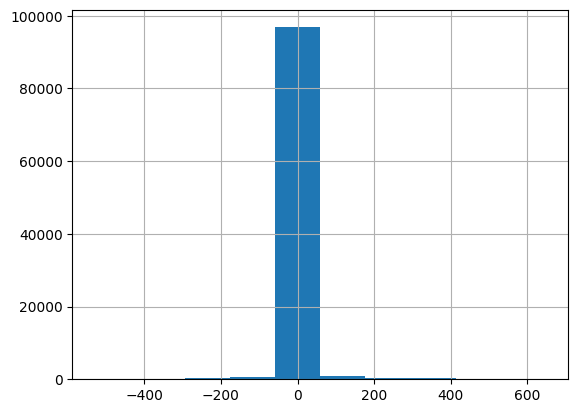

In [1733]:
orders_df.delivery_time.hist()

In [1734]:
customer_id_in_orders_df = orders_df.customer_id.unique()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
customers_df.sample(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status
46532,e4efcc8ddbd88af5d9cc88c4e96b5f48,a44b31b99d33ba6c128b857d28842ea8,70737,brasilia,DF,Active
51050,f45dc44959f8086d22e2d52553f15f57,2a5474461e07b6b56772a17b0db2e9bf,95750,salvador do sul,RS,Active
55318,fdfbcfe8a1292a3eda3a38d8859cfdbd,bc4de385d166457f0a9f39e61514e258,47240,pilao arcado,BA,Active
82509,dffc41c0be79bbb7084134618223fcf0,1529931ae589e40510ce709d0f4e83ba,35162,ipatinga,MG,Active
77115,1f95dbeb011c0827bbf2e50fa4624ce3,c8101c976368f023802d303cf3286a50,95180,farroupilha,RS,Active


In [1735]:
customers_df.groupby("status").customer_id.count()

status
Active    99441
Name: customer_id, dtype: int64

In [1736]:
customers_df[customers_df.status == "Non Active"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,status


### Explore order_items_df

In [1737]:
order_items_df.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
49211,6fcd48d9bce8191ebd8355decc3e54b8,1,3dd2a17168ec895c781a9191c1e95ad7,de722cd6dad950a92b7d4f82673f8833,2018-03-05 22:08:23,149.90,19.59
96935,dbf28dc3dffa48ddd066ad50c10c54e6,1,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2018-02-09 14:10:41,54.99,21.18
1005,02557013eeaffd86a6cc5ffd80a4b54e,2,4ce8f190d8026353d3d91d907ad68f23,157c3e4b42f81ac4a44e8b1ca2fe9876,2018-02-21 22:06:52,90.00,9.44
2727,062171ae61a088263fec533c7b4aadca,1,e6d3e381889aa6e9d222ad50cb30ac43,b33e7c55446eabf8fe1a42d037ac7d6d,2017-12-07 17:19:58,219.00,17.97
95321,d83704206184936b569352ae7f704788,2,4e5dc46fe4e31dd605f374ee43f0268e,de0c78824586e9a5f5f04fd84e25df39,2018-06-19 01:01:52,103.00,0.33


In [1738]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [1739]:
order_items_df.groupby(["order_id", "product_id"]).agg({
    "order_item_id": "nunique",
    "price": ["min", "max", "sum"],
    "freight_value": ["sum"]
}).head(10)

order_item_id  \
                                                                        nunique   
order_id                         product_id                                       
00010242fe8c5a6d1ba2dd792cb16214 4244733e06e7ecb4970a6e2683c13e61             1   
00018f77f2f0320c557190d7a144bdd3 e5f2d52b802189ee658865ca93d83a8f             1   
000229ec398224ef6ca0657da4fc703e c777355d18b72b67abbeef9df44fd0fd             1   
00024acbcdf0a6daa1e931b038114c75 7634da152a4610f1595efa32f14722fc             1   
00042b26cf59d7ce69dfabb4e55b4fd9 ac6c3623068f30de03045865e4e10089             1   
00048cc3ae777c65dbb7d2a0634bc1ea ef92defde845ab8450f9d70c526ef70f             1   
00054e8431b9d7675808bcb819fb4a32 8d4f2bb7e93e6710a28f34fa83ee7d28             1   
000576fe39319847cbb9d288c5617fa6 557d850972a7d6f792fd18ae1400d9b6             1   
0005a1a1728c9d785b8e2b08b904576c 310ae3c140ff94b03219ad0adc3c778f             1   
0005f50442cb953dcd1d21e1fb923495 4535b0e1091c278dfd193e5a1d63b39f             1   

                                                                    price  \
                                                                      min   
order_id                         product_id                                 
00010242fe8c5a6d1ba2dd792cb16214 4244733e06e7ecb4970a6e2683c13e61   58.90   
00018f77f2f0320c557190d7a144bdd3 e5f2d52b802189ee658865ca93d83a8f  239.90   
000229ec398224ef6ca0657da4fc703e c777355d18b72b67abbeef9df44fd0fd  199.00   
00024acbcdf0a6daa1e931b038114c75 7634da152a4610f1595efa32f14722fc   12.99   
00042b26cf59d7ce69dfabb4e55b4fd9 ac6c3623068f30de03045865e4e10089  199.90   
00048cc3ae777c65dbb7d2a0634bc1ea ef92defde845ab8450f9d70c526ef70f   21.90   
00054e8431b9d7675808bcb819fb4a32 8d4f2bb7e93e6710a28f34fa83ee7d28   19.90   
000576fe39319847cbb9d288c5617fa6 557d850972a7d6f792fd18ae1400d9b6  810.00   
0005a1a1728c9d785b8e2b08b904576c 310ae3c140ff94b03219ad0adc3c778f  145.95   
0005f50442cb953dcd1d21e1fb923495 4535b0e1091c278dfd193e5a1d63b39f   53.99   

                                                                           \
                                                                      max   
order_id                         product_id                                 
00010242fe8c5a6d1ba2dd792cb16214 4244733e06e7ecb4970a6e2683c13e61   58.90   
00018f77f2f0320c557190d7a144bdd3 e5f2d52b802189ee658865ca93d83a8f  239.90   
000229ec398224ef6ca0657da4fc703e c777355d18b72b67abbeef9df44fd0fd  199.00   
00024acbcdf0a6daa1e931b038114c75 7634da152a4610f1595efa32f14722fc   12.99   
00042b26cf59d7ce69dfabb4e55b4fd9 ac6c3623068f30de03045865e4e10089  199.90   
00048cc3ae777c65dbb7d2a0634bc1ea ef92defde845ab8450f9d70c526ef70f   21.90   
00054e8431b9d7675808bcb819fb4a32 8d4f2bb7e93e6710a28f34fa83ee7d28   19.90   
000576fe39319847cbb9d288c5617fa6 557d850972a7d6f792fd18ae1400d9b6  810.00   
0005a1a1728c9d785b8e2b08b904576c 310ae3c140ff94b03219ad0adc3c778f  145.95   
0005f50442cb953dcd1d21e1fb923495 4535b0e1091c278dfd193e5a1d63b39f   53.99   

                                                                           \
                                                                      sum   
order_id                         product_id                                 
00010242fe8c5a6d1ba2dd792cb16214 4244733e06e7ecb4970a6e2683c13e61   58.90   
00018f77f2f0320c557190d7a144bdd3 e5f2d52b802189ee658865ca93d83a8f  239.90   
000229ec398224ef6ca0657da4fc703e c777355d18b72b67abbeef9df44fd0fd  199.00   
00024acbcdf0a6daa1e931b038114c75 7634da152a4610f1595efa32f14722fc   12.99   
00042b26cf59d7ce69dfabb4e55b4fd9 ac6c3623068f30de03045865e4e10089  199.90   
00048cc3ae777c65dbb7d2a0634bc1ea ef92defde845ab8450f9d70c526ef70f   21.90   
00054e8431b9d7675808bcb819fb4a32 8d4f2bb7e93e6710a28f34fa83ee7d28   19.90   
000576fe39319847cbb9d288c5617fa6 557d850972a7d6f792fd18ae1400d9b6  810.00   
0005a1a1728c9d785b8e2b08b904576c 310ae3c140ff94b03219ad0adc3c778f  145.95   
0005f50442cb953dcd1d21e1fb923495 4535b0e1091c278dfd193e5a1

### Explore order_payments_df

In [1740]:
order_payments_df.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
39682,fda9b4bb2887d3fb7623f0bf922ca00f,1,credit_card,4,738.57
25882,6325af88a0611fc357055cb87dcec11e,1,boleto,1,100.38
55246,266d1afe42f1f376499cdd8e6df164d9,1,boleto,1,41.07
25538,f6ea8cbcc8900287db116d4edbdc7c7d,1,credit_card,5,53.57
78158,f8f4b67dd9b542e87eaa095b8224626b,1,credit_card,1,40.29


In [1741]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [1742]:
order_payments_df.groupby("payment_type").agg({
    "payment_value": ["min", "max", "mean"],
    "order_id": "nunique"
}).sort_values(by=("payment_value", "mean"), ascending=False)

payment_value                       order_id
                       min       max        mean  nunique
payment_type                                             
credit_card           0.01  13664.08  163.319021    76505
boleto               11.62   7274.88  145.034435    19784
debit_card           13.38   4445.50  142.570170     1528
voucher               0.00   3184.34   65.703354     3866
not_defined           0.00      0.00    0.000000        3

### Explore order_reviews_df

In [1743]:
order_reviews_df.sample(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
69076,d9b59843977ca5abe27d874e48f84b06,745e1d4a7f8c4b548881788d4113bb1d,4,Blank,Blank,2017-12-15,2017-12-16 10:19:43
3271,4f2780a7b52df6417d4a1463e493b5b7,88791555f9832d0bee1f87f2074392ef,3,Blank,"O pedido chegou no tempo previsto.O produto,\r...",2017-12-20,2017-12-20 23:41:46
40484,0c535219dab171eb98f24b60c9d6525f,8d2bf5a428d30fa82c85d57bea01159e,4,Blank,Blank,2018-01-12,2018-01-16 21:33:47
76870,27dec7f707fdd3c00c8d9884abb0bde8,4a5d255caafbd8a6296a119b0611d858,5,Blank,Produto com qualidade e os serviços de entrega...,2017-09-30,2017-09-30 18:36:09
6483,74a895faaee839366286bb4bf54b8f42,6496123f97cc047a754312e1de27f81f,4,Blank,Blank,2018-03-14,2018-03-17 21:08:28


In [1744]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Blank,Blank,NaN,NaN
freq,3,3,NaN,87656,58247,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [1745]:
order_reviews_df['review_id'] = order_reviews_df['review_id'].astype(str).str.strip()

grouped_df = order_reviews_df.groupby("review_score").agg({
    "review_id": "nunique",
    "review_creation_date": ["min", "max"]
})

grouped_df.sort_values(by=("review_id", "nunique"), ascending=False)

review_id review_creation_date           
               nunique                  min        max
review_score                                          
5                56910  2016-10-16 01:00:00 2018-08-31
4                19007  2016-10-15 00:00:00 2018-08-31
1                11282  2016-10-02 00:00:00 2018-08-31
3                 8097  2016-10-19 00:00:00 2018-08-31
2                 3114  2016-10-22 00:00:00 2018-08-31

### Explore product_category_name_translation_df

In [1746]:
product_category_name_translation_df.sample(5)

,product_category_name,product_category_name_english
55,fashion_roupa_feminina,fashio_female_clothing
41,instrumentos_musicais,musical_instruments
17,fashion_bolsas_e_acessorios,fashion_bags_accessories
30,moveis_escritorio,office_furniture
34,artigos_de_festas,party_supplies


In [1747]:
product_category_name_translation_df.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


### Explore products_df

In [1748]:
products_df.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
14901,c8912823a1b11a32f009ba6474f8ac72,fashion_bolsas_e_acessorios,54.0,354.0,3.0,200.0,43.0,16.0,27.0
15702,b33e45187a97dab72b3c819e76efc972,moveis_decoracao,49.0,1749.0,3.0,4200.0,105.0,3.0,70.0
25087,eea3e07f864a0a1389726d8a5f31c3f6,perfumaria,45.0,955.0,2.0,125.0,16.0,11.0,14.0
29576,400a34a0f268b8c1d7e6dd793d8c7ee4,esporte_lazer,28.0,218.0,2.0,1100.0,60.0,15.0,15.0
29377,751fe3ca6058edd02011a3cd408211f3,brinquedos,56.0,917.0,6.0,1600.0,23.0,41.0,16.0


In [1749]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.150458,629.208849,1.720614,4281.908773,16.913945,13.637140,12.078681
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,604.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [1750]:
products_df.groupby("product_category_name").agg({
    "product_id": "nunique",
    "product_weight_g": ["min", "max", "mean"]
}).sort_values(by=("product_weight_g", "mean"), ascending=False)

product_id product_weight_g  \
                                                  nunique              min   
product_category_name                                                        
moveis_colchao_e_estofado                              10           1700.0   
moveis_escritorio                                     309             50.0   
moveis_cozinha_area_de_servico_jantar_e_jardim         94             50.0   
moveis_quarto                                          45             50.0   
eletrodomesticos_2                                     90            250.0   
...                                                   ...              ...   
tablets_impressao_imagem                                9            100.0   
fashion_underwear_e_moda_praia                         53            100.0   
fashion_esporte                                        19            100.0   
fashion_roupa_infanto_juvenil                           5            100.0   
telefonia                                            1134             50.0   

                                                                       
                                                    max          mean  
product_category_name                                                  
moveis_colchao_e_estofado                       30000.0  13190.000000  
moveis_escritorio                               30000.0  12740.867314  
moveis_cozinha_area_de_servico_jantar_e_jardim  30000.0  11598.563830  
moveis_quarto                                   30000.0   9997.222222  
eletrodomesticos_2                              30000.0   9913.333333  
...                                                 ...           ...  
tablets_impressao_imagem                         1100.0    381.444444  
fashion_underwear_e_moda_praia                   2300.0    362.264151  
fashion_esporte                                  1500.0    344.736842  
fashion_roupa_infanto_juvenil                     600.0    324.000000  
telefonia                                        8100.0    236.506173  

[73 rows x 4 columns]

### Merge All Data

#### Merge orders_df & customers_df menjadi merged_df

In [1751]:
merged_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')

In [1752]:
# Jumlah pesanan per negara bagian:
merged_df.groupby("customer_state").order_id.nunique().sort_values(ascending=False).head(10)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
Name: order_id, dtype: int64

In [1753]:
# 10 kota dengan jumlah pesanan terbanyak:
merged_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).head(10)

customer_city
sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: order_id, dtype: int64

#### Merge merged_df & order_items_df 

In [1754]:
merged_df = pd.merge(merged_df, order_items_df, on='order_id', how='left')

#### Merge merged_df & products_df

In [1755]:
merged_df = pd.merge(merged_df, products_df, on='product_id', how='left')

#### Merge merged_df & product_category_name_translation_df

In [1756]:
merged_df = pd.merge(merged_df, product_category_name_translation_df, on='product_category_name', how='left')

#### Merge merged_df & sellers_df

In [1757]:
merged_df = pd.merge(merged_df, sellers_df, on='seller_id', how='left')

In [1758]:
# Jumlah pesanan per penjual:
merged_df.groupby(by="seller_id").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "price": "sum"
}).sort_values(by="price", ascending=False)

,order_id,order_item_id,price
seller_id,,,
4869f7a5dfa277a7dca6462dcf3b52b2,1132,1193.0,229472.63
53243585a1d6dc2643021fd1853d8905,358,504.0,222776.05
4a3ca9315b744ce9f8e9374361493884,1806,2269.0,200472.92
fa1c13f2614d7b5c4749cbc52fecda94,585,594.0,194042.03
7c67e1448b00f6e969d365cea6b010ab,982,2172.0,187923.89
...,...,...,...
34aefe746cd81b7f3b23253ea28bef39,1,1.0,8.00
702835e4b785b67a084280efca355756,1,1.0,7.60
1fa2d3def6adfa70e58c276bb64fe5bb,1,5.0,6.90


In [1759]:
# Penjual dengan penjualan tertinggi:
merged_df.groupby(by="seller_state").agg({
    "order_id": "nunique",
    "order_item_id": "sum",
    "price": "sum"
}).sort_values(by="price", ascending=False).head(10)

,order_id,order_item_id,price
seller_state,,,
SP,70188,97062.0,8753396.21
PR,7673,10266.0,1261887.21
MG,7930,10298.0,1011564.74
RJ,4353,5638.0,843984.22
SC,3667,4874.0,632426.07
RS,1989,2548.0,378559.54
BA,569,764.0,285561.56
DF,824,1023.0,97749.48
PE,406,519.0,91493.85


#### Merge merged_df & order_payments_df

In [1760]:
merged_df = pd.merge(merged_df, order_payments_df, on='order_id', how='left')

In [1761]:
# Jumlah pesanan per metode pembayaran:

merged_df.groupby(by="payment_type").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
payment_type,,
credit_card,76505,15694885.84
boleto,19784,4086820.71
voucher,3866,432602.19
debit_card,1528,256417.92
not_defined,3,0.00


In [1762]:
# Rata-rata nilai pembayaran per metode pembayaran:
merged_df.groupby(by="payment_type").payment_value.mean().sort_values(ascending=False)

payment_type
credit_card    179.809887
boleto         177.402470
debit_card     151.011731
voucher         67.520242
not_defined      0.000000
Name: payment_value, dtype: float64

#### Merge merged_df & order_reviews_df

In [1763]:
merged_df = pd.merge(merged_df, order_reviews_df, on='order_id', how='left')


In [1764]:
merged_df.groupby(by="review_score").order_id.nunique().sort_values(ascending=False)

review_score
5.0    57076
4.0    19098
1.0    11393
3.0     8160
2.0     3148
Name: order_id, dtype: int64

In [1765]:
merged_df["delivery_time"] = (pd.to_datetime(merged_df["order_delivered_customer_date"]) - 
                                    pd.to_datetime(merged_df["order_purchase_timestamp"])).dt.days
merged_df.groupby(by="review_score").delivery_time.mean().sort_values(ascending=False)

review_score
1.0    26.797576
2.0    18.127343
3.0    14.494138
4.0    12.422062
5.0    10.541323
Name: delivery_time, dtype: float64

#### Merge merged_df & geolocation_df (Saya tidak menemukan cara untuk di merge agar ukuran tidak terlalu besar)

In [1766]:
# # supaya bisa digabung, nama kolom yang ada di geolocation harus diganti dulu agar ada kesamaan nama kolom dengan merged_df
# geolocation_df.rename(columns={'geolocation_zip_code_prefix': 'customer_zip_code_prefix'}, inplace=True)

In [1767]:
# merged_df = pd.merge(merged_df, geolocation_df, on='customer_zip_code_prefix', how='left')

#### Create all_data_csv

In [1768]:
merged_df.to_csv("all_data.csv", index=False)

### Explore All Data

In [1769]:
print(merged_df.columns)

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'delivery_time', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'status', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp'],
      dtype='object')


In [1770]:
# Agregasi berdasarkan 'customer_state' saja untuk order dan total price
merged_df.groupby(by="customer_state").agg({
    "order_id": "nunique",  
    "price": "sum"           
}).sort_values(by="price", ascending=False)

,order_id,price
customer_state,,
SP,41746,5477008.74
RJ,12852,1921752.53
MG,11635,1645847.27
RS,5466,791716.84
PR,5045,708794.22
BA,3380,543243.99
SC,3637,539896.20
DF,2140,315122.29
GO,2020,313198.27


In [1771]:
# Agregasi berdasarkan 'customer_city' dan 'product_category_name_english':
merged_df.groupby(by=["customer_city", "product_category_name_english"]).agg({
    "order_item_id": "sum",  
    "price": "sum"           
}).sort_values(by="price", ascending=False).head(10)

order_item_id      price
customer_city  product_category_name_english                          
sao paulo      bed_bath_table                        3207.0  214388.69
               health_beauty                         2326.0  195263.02
               watches_gifts                          966.0  172269.07
               sports_leisure                        1634.0  154139.05
               computers_accessories                 1794.0  147079.12
               housewares                            1877.0  114218.96
               furniture_decor                       1882.0  108034.49
rio de janeiro bed_bath_table                        1271.0   95769.66
               watches_gifts                          521.0   93978.44
               health_beauty                          683.0   88299.24

In [1772]:
# Agregasi berdasarkan 'seller_city' dan 'product_category_name_english':
merged_df.groupby(by=["seller_city", "product_category_name_english"]).agg({
    "order_item_id": "sum",  
    "price": "sum"           
}).sort_values(by="price", ascending=False).head(10)

order_item_id      price
seller_city      product_category_name_english                          
ibitinga         bed_bath_table                        8043.0  547858.42
sao paulo        cool_stuff                            2203.0  299790.58
                 furniture_decor                       4487.0  272006.04
                 health_beauty                         2297.0  257860.28
                 sports_leisure                        2301.0  209982.97
guariba          watches_gifts                         1060.0  208499.73
itaquaquecetuba  office_furniture                      2285.0  208460.74
sumare           watches_gifts                          610.0  202034.93
sao paulo        bed_bath_table                        1901.0  191976.37
lauro de freitas computers                              179.0  186720.23

In [1773]:
#Agregasi berdasarkan 'seller_state' dan 'product_category_name_english':
merged_df.groupby(by=["seller_state", "product_category_name_english"]).agg({
    "order_item_id": "sum",  
    "price": "sum"           
}).sort_values(by="price", ascending=False).head(10)

order_item_id       price
seller_state product_category_name_english                           
SP           bed_bath_table                       14445.0  1106905.77
             watches_gifts                         5340.0  1013983.08
             health_beauty                         7729.0   727029.33
             sports_leisure                        6519.0   631002.02
             furniture_decor                       9478.0   525989.47
             cool_stuff                            3156.0   465398.98
             housewares                            6921.0   411079.88
             auto                                  4046.0   402750.64
             computers_accessories                 4509.0   366860.59
             baby                                  2537.0   319240.06

Insight :
 - Eksplorasi Data Individual:
    - Sampling: Mengambil sampel acak data (misal: product_category_name_translation_df.sample(5)) untuk melihat sekilas isi data.
    - Statistik Deskriptif: Menghitung statistik seperti mean, median, mode, standar deviasi, nilai minimum dan maksimum untuk setiap kolom (numerik   dan kategorikal) menggunakan describe(include="all"). Ini memberikan gambaran umum tentang distribusi data.

 - Penggabungan Data:
    - Merge: Menggabungkan beberapa DataFrame menjadi satu DataFrame yang lebih besar (misal, all_data.csv). Ini memungkinkan kita menganalisis hubungan antara variabel dari berbagai tabel.

 - Eksplorasi Data Gabungan:
    - Agregasi: Melakukan agregasi data untuk mendapatkan ringkasan yang lebih tinggi. Misalnya, menghitung jumlah pesanan per kategori produk, total penjualan per bulan, atau rata-rata nilai transaksi per pelanggan.

## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana performa penjualan dan revenue berdasarkan wilayah?

In [1774]:
# Mengelompokkan data berdasarkan state dan menghitung jumlah pesanan serta total revenue
state_sales_df = merged_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "price": "sum"
}).reset_index()

In [1775]:
# Mengganti nama kolom untuk memperjelas
state_sales_df.rename(columns={
    "order_id": "order_count",
    "price": "revenue"
}, inplace=True)

C:\Users\M S I\AppData\Local\Temp\ipykernel_22664\482981771.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


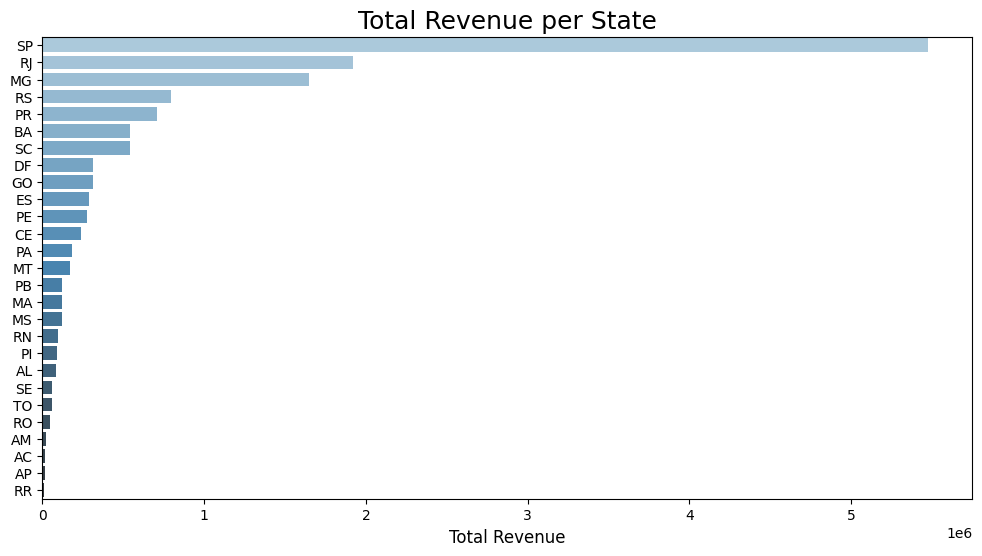

In [1776]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x="revenue", 
    y="customer_state", 
    data=state_sales_df.sort_values(by="revenue", ascending=False),
    palette="Blues_d"
)
plt.title("Total Revenue per State", loc="center", fontsize=18)
plt.ylabel(None)
plt.xlabel("Total Revenue", fontsize=12)
plt.tick_params(axis='y', labelsize=10)
plt.show()

C:\Users\M S I\AppData\Local\Temp\ipykernel_22664\1306813503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


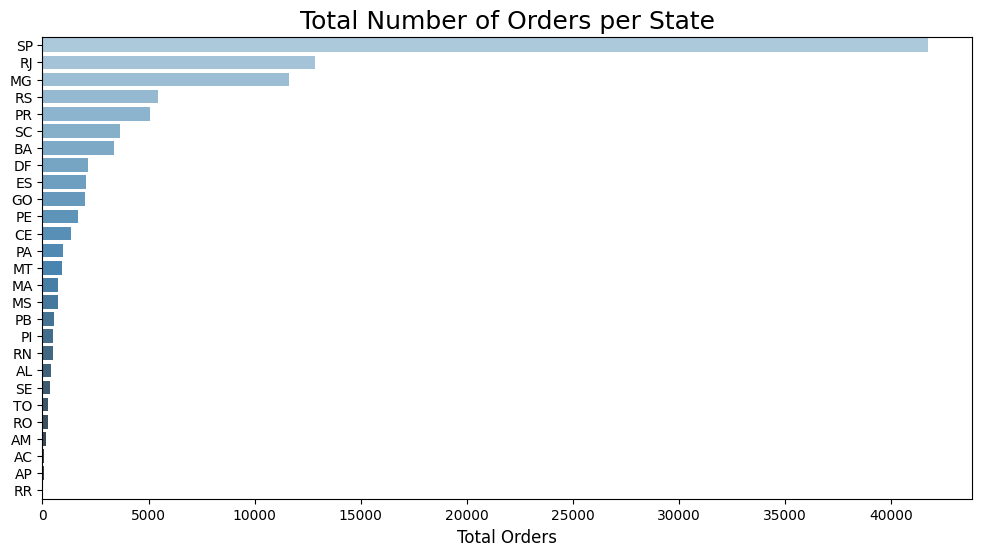

In [1777]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x="order_count", 
    y="customer_state", 
    data=state_sales_df.sort_values(by="order_count", ascending=False),
    palette="Blues_d"
)
plt.title("Total Number of Orders per State", loc="center", fontsize=18)
plt.ylabel(None)
plt.xlabel("Total Orders", fontsize=12)
plt.tick_params(axis='y', labelsize=10)
plt.show()

### Pertanyaan 2 : Produk apa yang paling populer di setiap wilayah?

In [1778]:
# Mengelompokkan data berdasarkan produk dan menghitung jumlah produk yang terjual
product_sales_df = merged_df.groupby(by="product_category_name_english").agg({
    "order_item_id": "count"
}).reset_index()

In [1779]:
# Mengganti nama kolom
product_sales_df.rename(columns={
    "order_item_id": "product_sales_count"
}, inplace=True)

C:\Users\M S I\AppData\Local\Temp\ipykernel_22664\4074375345.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


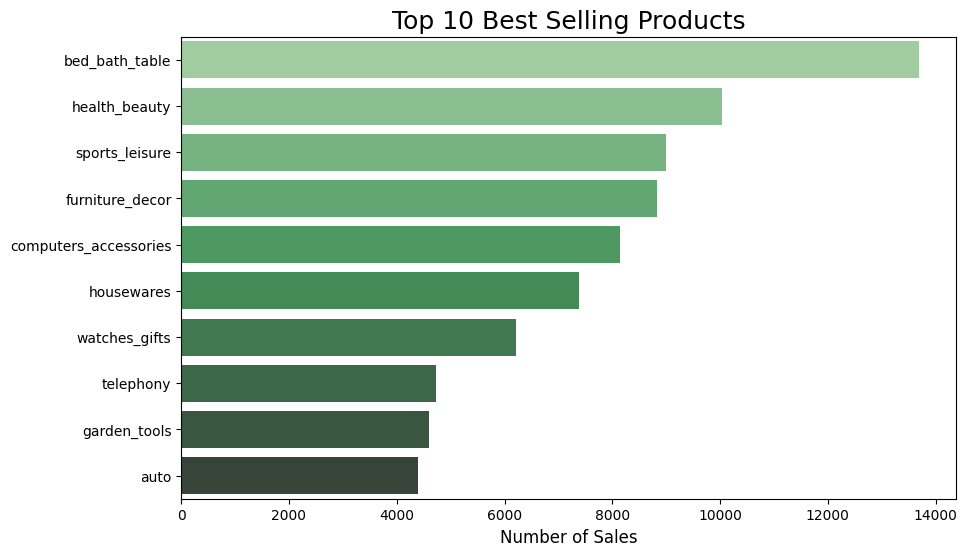

In [1780]:
# Produk yang paling banyak terjual
plt.figure(figsize=(10, 6))
sns.barplot(
    x="product_sales_count", 
    y="product_category_name_english", 
    data=product_sales_df.sort_values(by="product_sales_count", ascending=False).head(10),
    palette="Greens_d"
)
plt.title("Top 10 Best Selling Products", loc="center", fontsize=18)
plt.ylabel(None)
plt.xlabel("Number of Sales", fontsize=12)
plt.tick_params(axis='y', labelsize=10)
plt.show()

C:\Users\M S I\AppData\Local\Temp\ipykernel_22664\3321238522.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


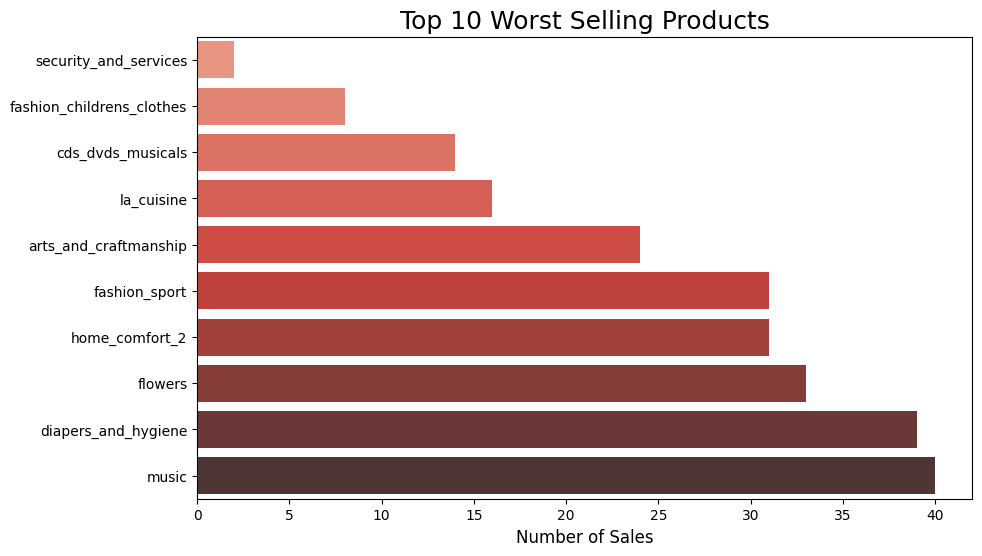

In [1781]:
# Produk yang paling sedikit terjual
plt.figure(figsize=(10, 6))
sns.barplot(
    x="product_sales_count", 
    y="product_category_name_english", 
    data=product_sales_df.sort_values(by="product_sales_count", ascending=True).head(10),
    palette="Reds_d"
)
plt.title("Top 10 Worst Selling Products", loc="center", fontsize=18)
plt.ylabel(None)
plt.xlabel("Number of Sales", fontsize=12)
plt.tick_params(axis='y', labelsize=10)
plt.show()

### Pertanyaan 3 : Apakah ada pola musiman dalam penjualan?

In [1782]:
# Agregasi data bulanan
monthly_sales_df = merged_df.resample('ME', on='order_purchase_timestamp').agg({
    'order_id': 'nunique',
    'price': 'sum'  
}).reset_index()

In [1783]:
# Mengubah format bulan untuk tampilan yang lebih baik
monthly_sales_df['order_purchase_timestamp'] = monthly_sales_df['order_purchase_timestamp'].dt.strftime('%B %Y')
monthly_sales_df.rename(columns={'order_id': 'order_count', 'price': 'total_sales'}, inplace=True)

C:\Users\M S I\AppData\Local\Temp\ipykernel_22664\649762757.py:4: UserWarning: 
The palette list has fewer values (2) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(
C:\Users\M S I\AppData\Local\Temp\ipykernel_22664\649762757.py:19: UserWarning: 
The palette list has fewer values (2) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


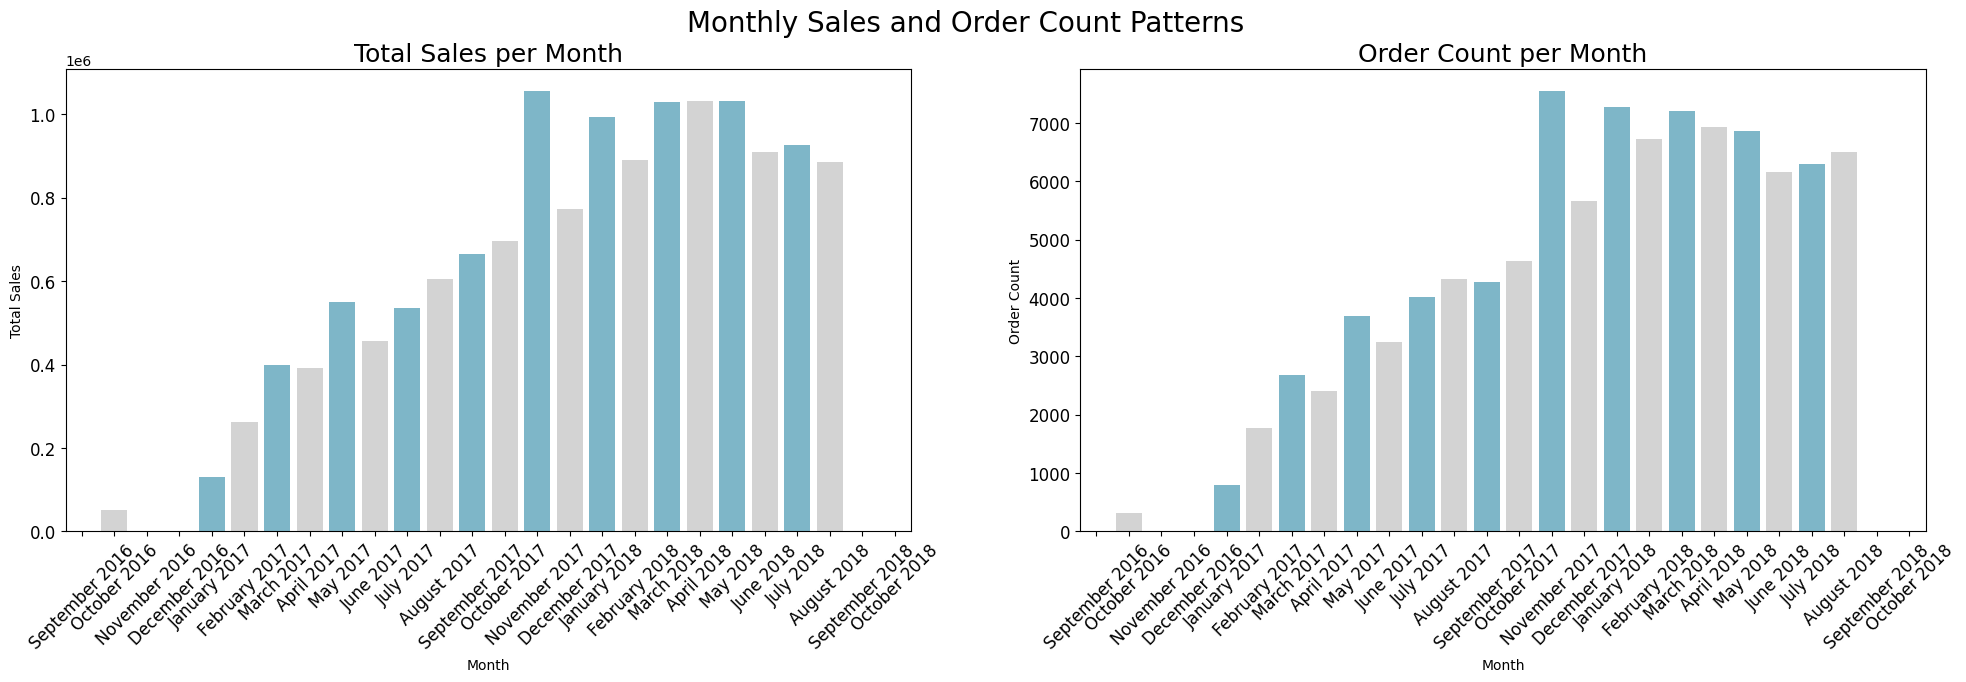

In [1784]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3"]

sns.barplot(
    x="order_purchase_timestamp", 
    y="total_sales", 
    hue="order_purchase_timestamp",
    data=monthly_sales_df,
    palette=colors,
    legend=False,
    ax=ax[0]
)
ax[0].set_title("Total Sales per Month", loc="center", fontsize=18)
ax[0].tick_params(axis='x', rotation=45, labelsize=12)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].set_ylabel("Total Sales")
ax[0].set_xlabel("Month")

sns.barplot(
    x="order_purchase_timestamp", 
    y="order_count", 
    hue="order_purchase_timestamp",
    data=monthly_sales_df,
    palette=colors,
    legend=False,
    ax=ax[1]
)
ax[1].set_title("Order Count per Month", loc="center", fontsize=18)
ax[1].tick_params(axis='x', rotation=45, labelsize=12)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].set_ylabel("Order Count")
ax[1].set_xlabel("Month")

plt.suptitle("Monthly Sales and Order Count Patterns", fontsize=20)
plt.show()

### Pertanyaan 4 : Apakah ada daerah atau demografi tertentu yang perlu fokus lebih karena penjualan rendah?

In [1785]:
# Mengelompokkan data berdasarkan state dan jumlah pesanan
low_sales_state_df = merged_df.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "price": "sum"
}).reset_index()

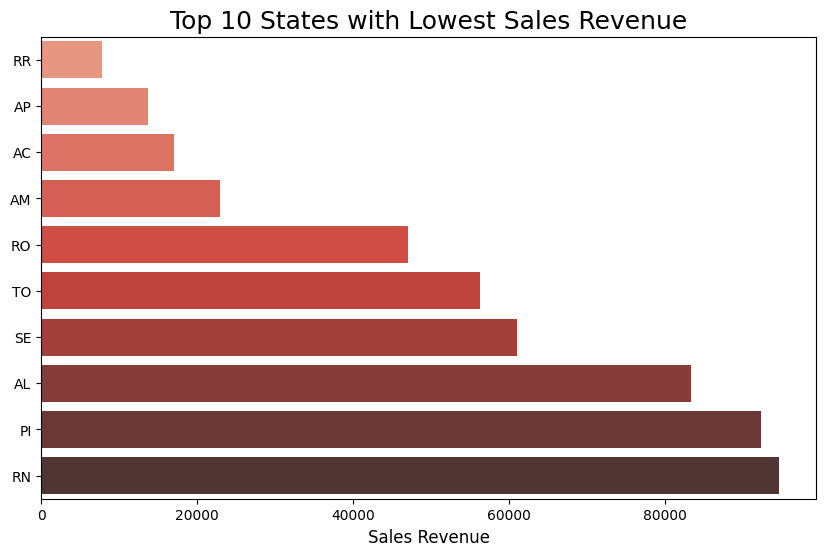

In [1786]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="price", 
    y="customer_state", 
    data=low_sales_state_df.sort_values(by="price", ascending=True).head(10),
    palette="Reds_d",
    hue="customer_state",
    dodge=False 
)
plt.title("Top 10 States with Lowest Sales Revenue", fontsize=18)
plt.ylabel(None)
plt.xlabel("Sales Revenue", fontsize=12)
plt.tick_params(axis='y', labelsize=10)
plt.show()

Insight :
- pertanyaan 1

    - Pengelompokan Data:
        - Data digabungkan berdasarkan customer_state untuk melihat agregasi pesanan dan pendapatan per wilayah.
        - Fungsi groupby digunakan untuk mengelompokkan data berdasarkan kolom customer_state.
        - Kemudian dilakukan agregasi untuk menghitung jumlah pesanan unik (order_id) dan total pendapatan (price).
    
    - Perubahan Nama Kolom:
        - Nama kolom hasil agregasi diubah menjadi order_count dan revenue untuk lebih mudah dipahami.
    
    - Visualisasi:
        - Bar Chart: Digunakan dua buah bar chart untuk memvisualisasikan hasil agregasi.
        - Sumbu-X: Pada grafik pertama, sumbu-X mewakili total pendapatan (revenue), sedangkan pada grafik kedua mewakili jumlah pesanan (order count).
        - Sumbu-Y: Kedua grafik memiliki sumbu-Y yang sama, yaitu nama wilayah (state).
        - Pengurutan: Data pada kedua grafik diurutkan berdasarkan nilai pada sumbu-X (revenue atau order count) secara descending, sehingga wilayah dengan pendapatan atau jumlah pesanan tertinggi akan berada di atas.

- pertanyaan 2

    - Pengelompokan Data:
        - Data digabungkan berdasarkan kategori produk (product_category_name_english) untuk menghitung jumlah produk yang terjual di setiap kategori.
        - Fungsi groupby digunakan untuk mengelompokkan data berdasarkan kolom product_category_name_english.
        - Kemudian dilakukan agregasi untuk menghitung jumlah pesanan (order_item_id) yang mewakili jumlah produk terjual.
    
    - Perubahan Nama Kolom:
        - Nama kolom hasil agregasi diubah menjadi product_sales_count untuk lebih mudah dipahami.
    
    - Visualisasi:
        - Bar Chart: Digunakan dua buah bar chart untuk memvisualisasikan hasil agregasi.
        - Sumbu-X: Pada kedua grafik, sumbu-X mewakili jumlah produk yang terjual (product_sales_count).
        - Sumbu-Y: Sumbu-Y mewakili nama kategori produk.
    
    - Pengurutan:
        - Grafik pertama mengurutkan data secara descending untuk menampilkan 10 produk teratas yang paling banyak terjual.
        - Grafik kedua mengurutkan data secara ascending untuk menampilkan 10 produk terbawah yang paling sedikit terjual.

- pertanyaan 3

    - Agregasi Data Bulanan:
        - Data digabungkan berdasarkan bulan pembelian (order_purchase_timestamp) untuk menghitung total penjualan dan jumlah pesanan per bulan.
        - Fungsi resample digunakan untuk mengelompokkan data secara bulanan.
        - Kemudian dilakukan agregasi untuk menghitung jumlah pesanan unik (order_id) dan total pendapatan (price).
    
    - Format Tanggal:
        - Format tanggal pada kolom order_purchase_timestamp diubah menjadi format yang lebih mudah dibaca (misalnya, "Bulan-Tahun").
    
    - Visualisasi:
        - Bar Chart: Digunakan dua buah bar chart untuk memvisualisasikan total penjualan dan jumlah pesanan per bulan.
       -  Sumbu-X: Sumbu-X mewakili bulan.
        - Sumbu-Y:
        - Grafik pertama: Sumbu-Y mewakili total penjualan.
        - Grafik kedua: Sumbu-Y mewakili jumlah pesanan.

- pertanyaan 4

    - Pengelompokan Data:
        - Data digabungkan berdasarkan customer_state untuk menghitung jumlah pesanan dan total pendapatan per wilayah.
        - Fungsi groupby digunakan untuk mengelompokkan data berdasarkan kolom customer_state.
        - Kemudian dilakukan agregasi untuk menghitung jumlah pesanan unik (order_id) dan total pendapatan (price).
    
    - Identifikasi Wilayah dengan Penjualan Rendah:
        - Dibuat DataFrame baru (low_sales_state_df) yang berisi informasi tentang wilayah dan total pendapatannya.
        - DataFrame ini kemudian diurutkan berdasarkan total pendapatan secara ascending (dari yang terendah ke tertinggi).
    
    - Visualisasi:
        - Bar Chart: Digunakan bar chart untuk memvisualisasikan 10 wilayah dengan total pendapatan terendah.
        - Sumbu-X: Sumbu-X mewakili total pendapatan (price).
        - Sumbu-Y: Sumbu-Y mewakili nama wilayah (customer_state).
        - Pengurutan: Data diurutkan secara ascending, sehingga wilayah dengan pendapatan terendah berada di atas.

## Analisis Lanjutan (RFM ANALYSIS)

In [1787]:
rfm_df = merged_df.groupby('customer_id', as_index=False).agg(
    order_delivered_customer_date=('order_delivered_customer_date', 'max'),
    order_id=('order_id', 'nunique'),
    price=('price', 'sum')
)

In [1788]:
rfm_df.columns = ["customer_id", "last_order_date", "frequency", "monetary"]

In [1789]:
rfm_df["last_order_date"] = pd.to_datetime(rfm_df["last_order_date"])
recent_date = merged_df["order_delivered_customer_date"].dt.date.max()
rfm_df["recency"] = rfm_df["last_order_date"].dt.date.apply(lambda x: (recent_date - x).days)


In [1790]:
rfm_df.drop("last_order_date", axis=1, inplace=True)

In [1791]:
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,323
1,000161a058600d5901f007fab4c27140,1,54.90,449
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,590
3,0002414f95344307404f0ace7a26f1d5,1,149.90,399
4,000379cdec625522490c315e70c7a9fb,1,93.00,187


In [1792]:
rfm_df.describe()

,frequency,monetary,recency
count,99441.0,99441.000000,99441.000000
mean,1.0,143.539382,276.122615
std,0.0,241.433332,151.050144
min,1.0,0.000000,0.000000
25%,1.0,45.950000,155.000000
50%,1.0,89.000000,257.000000
75%,1.0,153.800000,385.000000
max,1.0,13440.000000,736.000000


In [1793]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=True)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=False)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=False)

In [1794]:
rfm_df['r_rank_norm'] = (rfm_df['r_rank'] / rfm_df['r_rank'].max()) * 100
rfm_df['f_rank_norm'] = (rfm_df['f_rank'] / rfm_df['f_rank'].max()) * 100
rfm_df['m_rank_norm'] = (rfm_df['m_rank'] / rfm_df['m_rank'].max()) * 100

In [1795]:
rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

In [1796]:
rfm_df['RFM_score'] = 0.15 * rfm_df['r_rank_norm'] + 0.28 * rfm_df['f_rank_norm'] + 0.57 * rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)

In [1797]:
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.31
1,000161a058600d5901f007fab4c27140,3.99
2,0001fd6190edaaf884bcaf3d49edf079,2.69
3,0002414f95344307404f0ace7a26f1d5,2.73
4,000379cdec625522490c315e70c7a9fb,3.00
5,0004164d20a9e969af783496f3408652,3.91
6,000419c5494106c306a97b5635748086,4.02


In [1798]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", 
    np.where(rfm_df['RFM_score'] > 4, "High value customer", 
    np.where(rfm_df['RFM_score'] > 3, "Medium value customer", 
    np.where(rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers')))
)

In [1799]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()

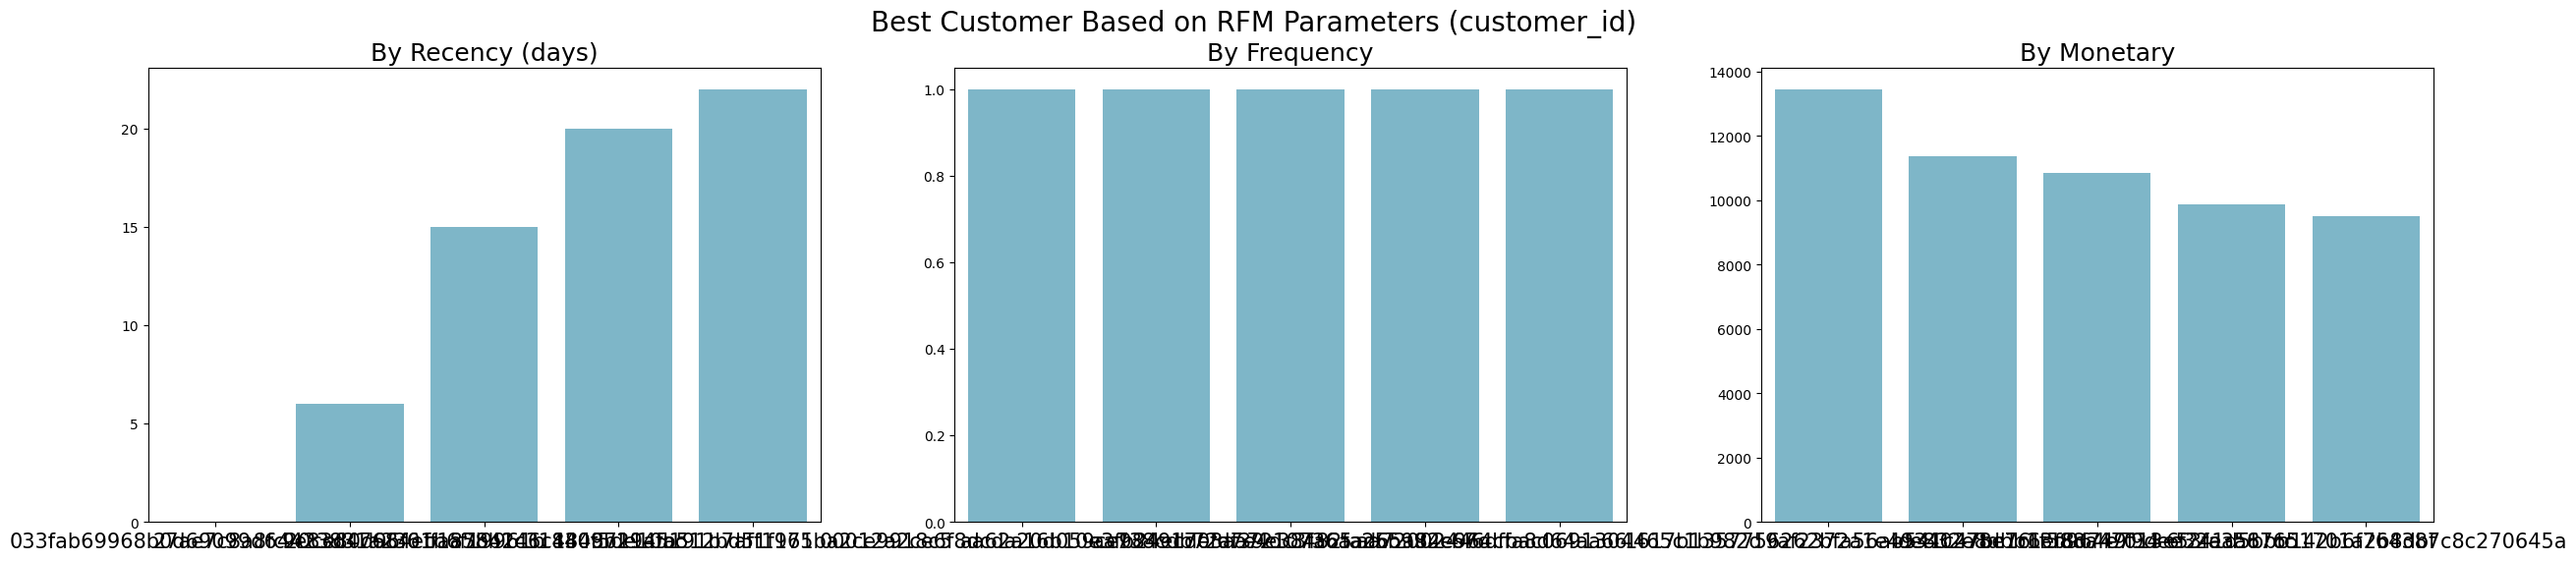

In [1800]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4"] 

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), color=colors[0], ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), color=colors[1], ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), color=colors[2], ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [1801]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])

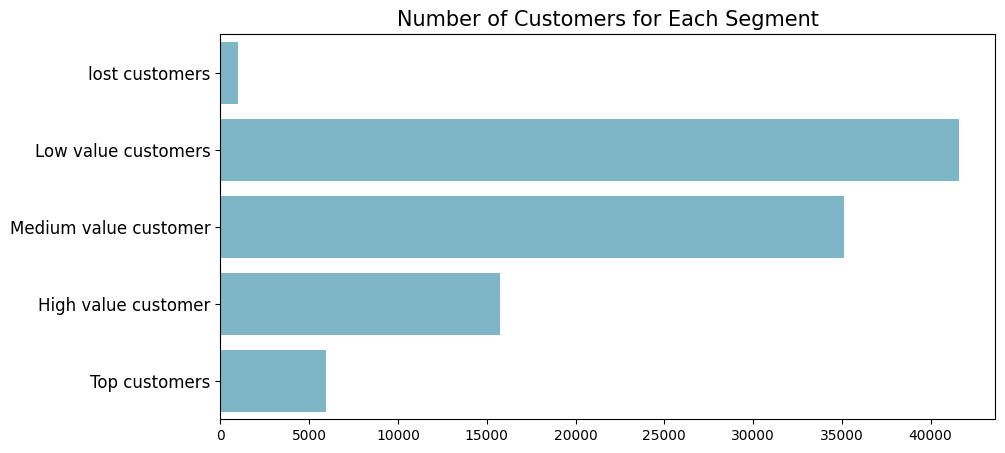

In [1802]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="customer_id", 
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    color="#72BCD4"  
)

plt.title("Number of Customers for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

Insight
- Recency: Menghitung berapa hari sejak pelanggan terakhir melakukan pembelian.
- Frequency: Menghitung berapa banyak transaksi yang dilakukan oleh pelanggan.
- Monetary: Menghitung total pengeluaran pelanggan selama periode analisis.

## Conclusion

- Conclusion pertanyaan 1

    Bagaimana performa penjualan dan revenue berdasarkan wilayah?

    Revenue :
    Dari visualisasi data tersebut state SP (Sao Paulo)sangat mendominasu distribusi total pendapatan yang dihasilkan diikuti oleh state MG diperingkat kedua. Secara umum, dapat disimpulkan bahwa terdapat disparitas yang signifikan antara pendapatan yang dihasilkan oleh berbagai negara bagian.

    Penjualan :
    Berdasarkan grafik, negara bagian SP (Sao Paulo) merupakan kontributor terbesar dalam jumlah total pesanan diikuti dengan state RJ (Rio De Janeiro) diperingkat kedua. Hal ini mengindikasikan adanya potensi pasar yang besar di wilayah tersebut. Namun, terdapat disparitas yang signifikan antara negara bagian SP dengan negara bagian lainnya.

- Conclusion pertanyaan 2

    Produk apa yang paling populer di setiap wilayah?

    Berdasarkan data visual di atas, dapat disimpulkan bahwa produk dengan kategori "bed_bath_table" merupakan produk yang paling banyak terjual, diikuti oleh "health_beauty" dan "furniture_decor".

- Conclusion pertanyaan 3

    Apakah ada pola musiman dalam penjualan?

    Berdasarkan visualisasi data penjualan bulanan, dapat disimpulkan bahwa terdapat pola musiman yang jelas dalam data. Fluktuasi penjualan yang terjadi secara konsisten setiap tahunnya mengindikasikan adanya periode puncak dan sepi penjualan. Pola musiman ini dapat dimanfaatkan untuk perencanaan bisnis yang lebih baik, seperti peramalan penjualan, pengelolaan inventaris, dan penyesuaian strategi pemasaran.

- Conclusion pertanyaan 4

    Apakah ada daerah atau demografi tertentu yang perlu fokus lebih karena penjualan rendah?
    
    Berdasarkan diagram batang, negara bagian seperti AL, PI, dan TO memiliki pendapatan penjualan yang jauh lebih rendah dibandingkan dengan negara bagian lainnya. Ini menunjukkan bahwa wilayah-wilayah ini mungkin memerlukan perhatian tambahan untuk meningkatkan penjualan.